# **Coding and analysis tasks**

In this exercise, we will play with some topographic data of Mars to extract geomorphologic features (crater, inter-crater plateau, crater wall, channels etc.) using unsupervised clustering method. You will use point.cvs data file to complete the tasks. Check the detailed information about this data file from data_description.pdf. Perform and doument the following tasks:

Perform exploratory data analysis (summary statistics, histogram, correlation plots) on each variable (except grid_code). Plot the map of each variable (except grid_code).
Perform k-means (try k=10, k=20, and k=30) clustering to the variables (all except grid_code) and a subset of the variables (except grid_code) based on your visual interpretation of each variable map (what variables may play a bigger role in differntiating those features).Plot your clustering maps, and comment on the results (for example, can those geomorphologic features be extracted? With the increasing K, will more subtle geomorphologic features show up?)
If you directly apply hierarchical clustering to the original data, you will find that the program will crash given the huge data volume. Try to apply hierarchical clustering to the k-means (k=30) result. Group your data based on the k-means clustering result, and calculate the average of each variable (except grid_code) for each group (k-mean cluster). Perform hierarchical clustering on the grouped data (30 data records) and plot the dendrogram. Comment on the results.

# Import Data and Install Packages

Install Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
#import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/lab5
%ls

/content/drive/My Drive/lab5
data_description.pdf  Lab5_RosemaryAkamagwuna.ipynb  point.csv


In [ ]:
mars_data = pd.read_csv ("point.csv")
mars_data_copy = mars_data.copy()



# Exploratory Data Analysis

In [ ]:

mars_data_copy.head()

,grid_code,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3
0,1,-457,0.449035,-10,-457,0,0,0,0
1,2,-456,0.531747,-7,-456,0,0,0,0
2,3,-455,0.545835,-9,-455,0,0,0,0
3,4,-452,0.326724,2,-452,0,0,0,0
4,5,-452,0.243527,-2,-452,0,0,0,0


In [ ]:
mars_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132704 entries, 0 to 132703
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   grid_code   132704 non-null  int64  
 1   dem         132704 non-null  int64  
 2   slope       132704 non-null  float64
 3   filter      132704 non-null  int64  
 4   fill_dem    132704 non-null  int64  
 5   fill_diff   132704 non-null  int64  
 6   hillshade1  132704 non-null  int64  
 7   hillshade2  132704 non-null  int64  
 8   hillshade3  132704 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 9.1 MB


In [ ]:
mars_data_copy.isna().sum()


grid_code     0
dem           0
slope         0
filter        0
fill_dem      0
fill_diff     0
hillshade1    0
hillshade2    0
hillshade3    0
dtype: int64

In [ ]:
mars_data_copy.describe()

,grid_code,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3
count,132704.000000,132704.000000,132704.000000,132704.000000,132704.000000,132704.000000,132704.000000,132704.000000,132704.000000
mean,66352.498674,-152.115882,2.384184,2.253828,-39.193287,112.922595,171.549968,112.644110,66.924780
std,38309.261196,473.955831,3.308193,53.174357,324.194192,267.873918,31.233281,60.950038,65.400356
min,1.000000,-1370.000000,0.000000,-618.000000,-1113.000000,0.000000,0.000000,0.000000,0.000000
25%,33088.750000,-425.000000,0.678360,-7.000000,-278.000000,0.000000,175.000000,58.000000,3.000000
50%,66352.500000,-95.000000,1.379060,0.000000,-81.000000,0.000000,180.000000,121.000000,45.000000
75%,99616.250000,253.000000,2.616540,7.000000,257.000000,0.000000,183.000000,177.000000,128.000000
max,132704.000000,698.000000,34.850300,946.000000,698.000000,918.000000,238.000000,238.000000,226.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


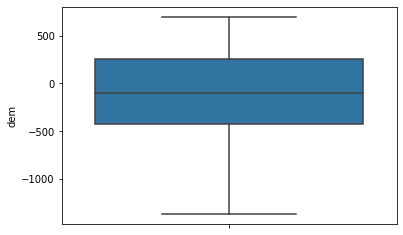

In [ ]:
sns.boxplot(y=mars_data_copy['dem'],orient='h')

The Digital Elevation Model has a distribution that is left skewed. This means we have fewer data points on the lower end than on the tail of the distribution. This shows that there are fewer craters than there are higher elevations in the location being sampled.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


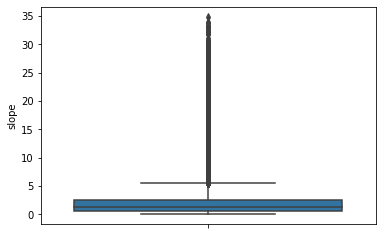

In [ ]:
sns.boxplot(y=mars_data_copy['slope'],orient='h')

The distribution of the slope is right skewed and has alot of outliers. These outliers will pose as noise and would not provide enough information.



/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


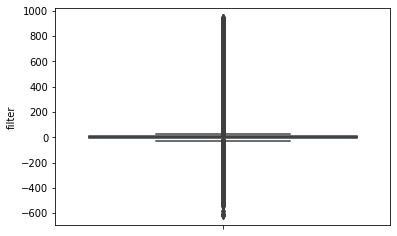

In [ ]:
sns.boxplot(y=mars_data_copy['filter'],orient='h')

The distribution of the filter has alot of outliers. These outliers will pose as noise and would not provide enough information.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


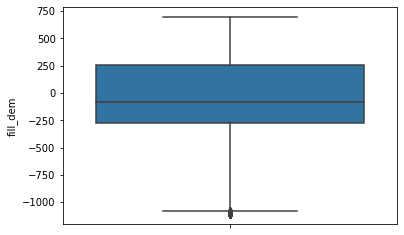

In [ ]:
sns.boxplot(y=mars_data_copy['fill_dem'],orient='h')

The distribution of the Fill_dem is left skewed and has very little outliers. More lucid information will likely be gotten from this data.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


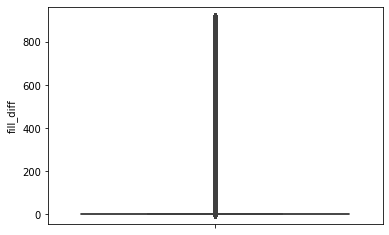

In [ ]:
sns.boxplot(y=mars_data_copy['fill_diff'],orient='h')

The distribution of the Fill_diff has alot of outliers. These outliers will pose as noise and would not provide enough information.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


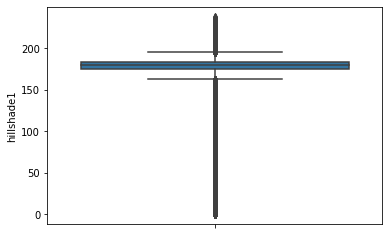

In [ ]:
sns.boxplot(y=mars_data_copy['hillshade1'],orient='h')

The distribution of the Hillshade1 looks like a symmetric distribution however it has alot of outliers. These outliers will pose as noise and would not provide enough information.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


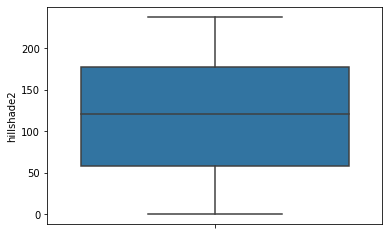

In [ ]:
sns.boxplot(y=mars_data_copy['hillshade2'],orient='h')

The Hillshade2 has a distribution that is almost perfectly symmetric or normal. Also there are no outliers, this hillshade is more likely to do the job of highlighting features based on elevations than hillshade1.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


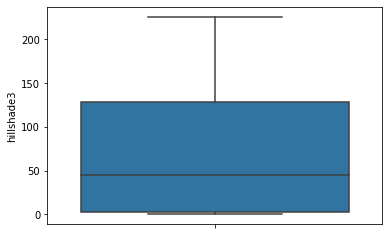

In [ ]:
sns.boxplot(y=mars_data_copy['hillshade3'],orient='h')

The Hillshade3 has a distribution that is right skewed. Also the distribution is positive and there are no outliers, this hillshade is more likely to do the job of highlighting elevated features.

In [ ]:
new_mars = mars_data_copy.drop(['grid_code'],axis=1)
new_mars_copy = new_mars.copy()
new_mars.head()

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3
0,-457,0.449035,-10,-457,0,0,0,0
1,-456,0.531747,-7,-456,0,0,0,0
2,-455,0.545835,-9,-455,0,0,0,0
3,-452,0.326724,2,-452,0,0,0,0
4,-452,0.243527,-2,-452,0,0,0,0


In [ ]:
new_mars.corr(method='pearson')

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3
dem,1.000000,-0.067139,0.102461,0.839484,-0.753340,0.343653,-0.108153,0.267589
slope,-0.067139,1.000000,-0.032806,-0.126031,-0.033737,-0.117500,-0.103561,-0.211563
filter,0.102461,-0.032806,1.000000,0.096266,-0.064780,-0.184209,-0.094276,-0.024235
fill_dem,0.839484,-0.126031,0.096266,1.000000,-0.275070,0.312815,0.176508,0.599947
fill_diff,-0.753340,-0.033737,-0.064780,-0.275070,1.000000,-0.229450,0.404976,0.252634
hillshade1,0.343653,-0.117500,-0.184209,0.312815,-0.229450,1.000000,-0.122708,0.011955
hillshade2,-0.108153,-0.103561,-0.094276,0.176508,0.404976,-0.122708,1.000000,0.819673
hillshade3,0.267589,-0.211563,-0.024235,0.599947,0.252634,0.011955,0.819673,1.000000


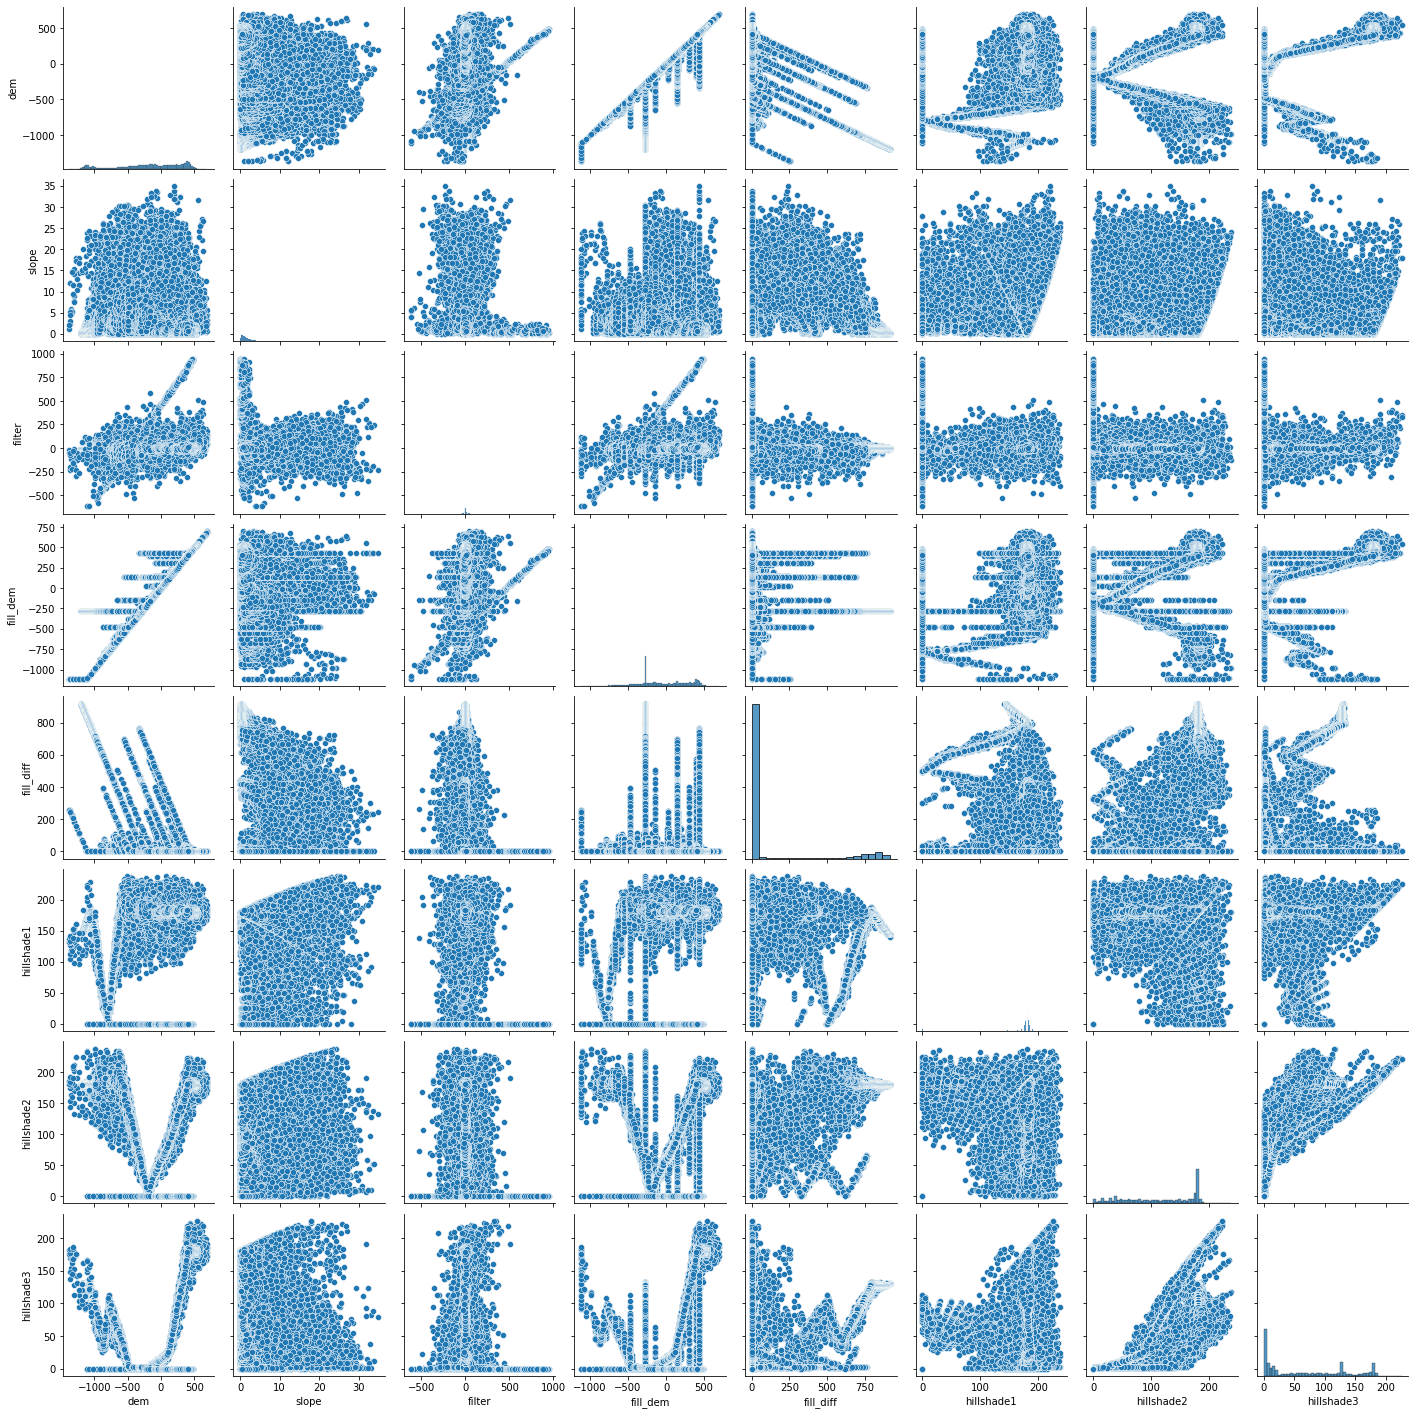

In [ ]:
sns.pairplot(new_mars,kind='scatter')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


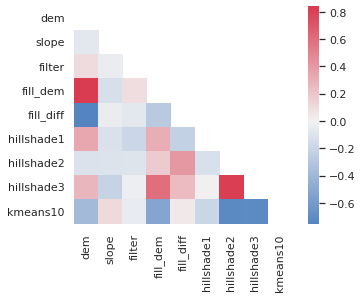

In [ ]:
# create a correlation graph
corr=new_mars.corr() # calculate the correlation matrix
sns.set(style='white')
cmap=sns.diverging_palette(250,8,as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # create the mask to mask out the upper triangle
sns.heatmap(corr,square=True,cmap=cmap,mask=mask,center=0)

From the correlation matrix, we can see that the variables with highest correlation are DEM, Fill_DEM, FILL_DIFF, HILLSHADE2 and HILLSHADE3. These variables could have patterns that we can explore with clustering. On the other hand the linearity between this variables may reduce the effect of clustering with other independent variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


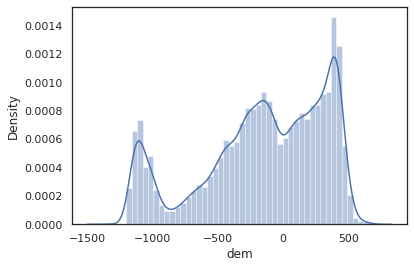

In [ ]:
# plot histogram without kernel density estimate
sns.distplot(mars_data_copy['dem'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


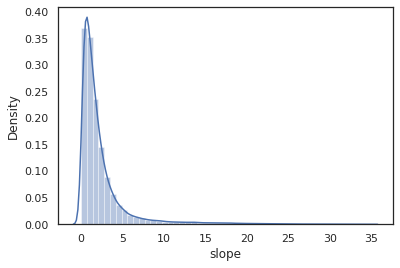

In [ ]:
# plot histogram without kernel density estimate
sns.distplot(mars_data_copy['slope'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


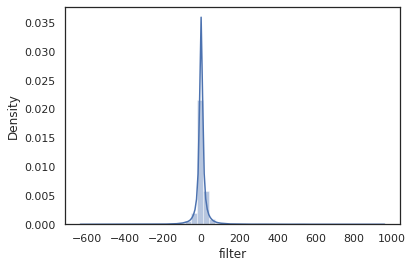

In [ ]:
# plot histogram without kernel density estimate
sns.distplot(mars_data_copy['filter'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


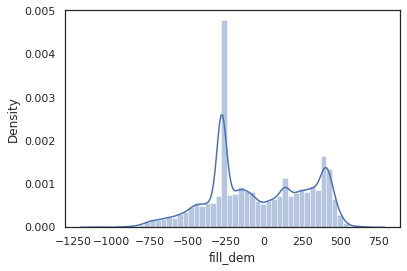

In [ ]:
# plot histogram without kernel density estimate
sns.distplot(mars_data_copy['fill_dem'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


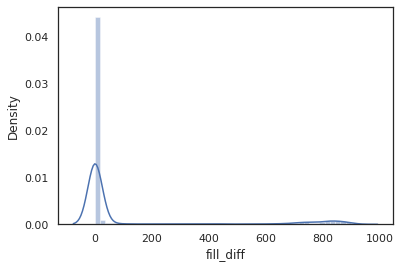

In [ ]:
# plot histogram without kernel density estimate
sns.distplot(mars_data_copy['fill_diff'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


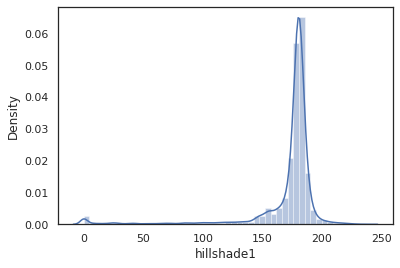

In [ ]:
# plot histogram without kernel density estimate
sns.distplot(mars_data_copy['hillshade1'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


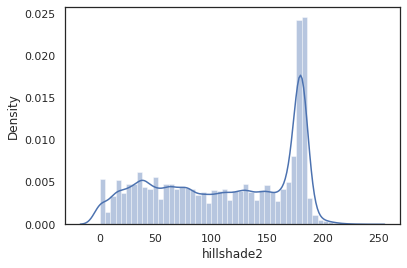

In [ ]:
# plot histogram without kernel density estimate
sns.distplot(mars_data_copy['hillshade2'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


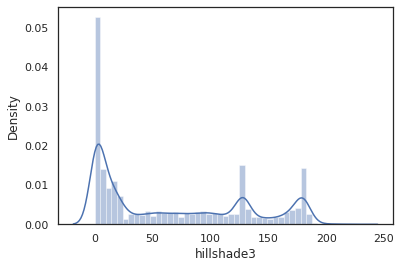

In [ ]:
# plot histogram without kernel density estimate
sns.distplot(mars_data_copy['hillshade3'],kde=True)

Plotting the Maps of the Variables

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#reshape data into 2-D matrix

dem=np.array(new_mars['dem']).reshape(352,377)
slope=np.array(new_mars['slope']).reshape(352,377)
filter=np.array(new_mars['filter']).reshape(352,377)
fill_dem=np.array(new_mars['fill_dem']).reshape(352,377)
fill_diff=np.array(new_mars['fill_diff']).reshape(352,377)
hillshade1=np.array(new_mars['hillshade1']).reshape(352,377)
hillshade2=np.array(new_mars['hillshade2']).reshape(352,377)
hillshade3=np.array(new_mars['hillshade3']).reshape(352,377)


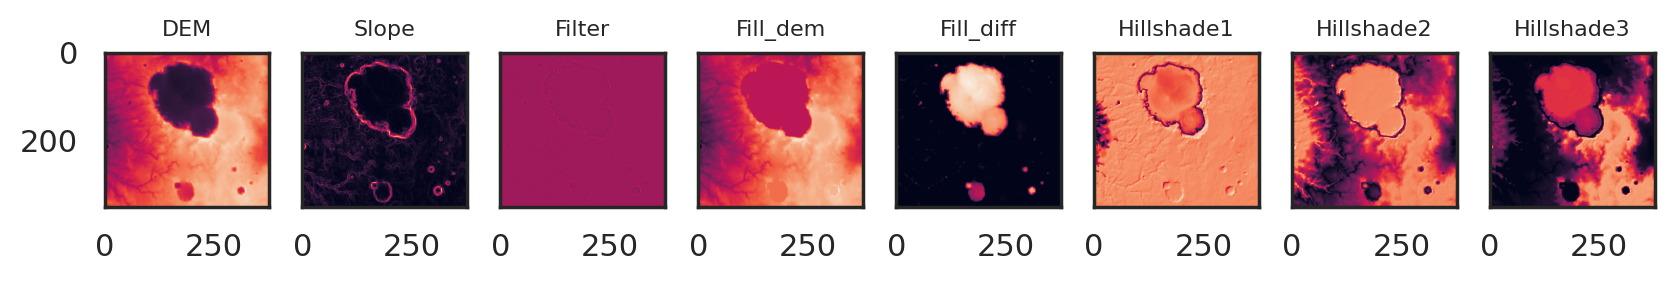

In [ ]:
#Plot the Maps of the Variables
fig, ax = plt.subplots(1,8,figsize=(10, 60),dpi=200, sharey=True)

ax[0].imshow(dem)
ax[0].set_title('DEM',{'fontsize':8})
ax[1].imshow(slope)
ax[1].set_title('Slope',{'fontsize':8})
ax[2].imshow(filter)
ax[2].set_title('Filter',{'fontsize':8})
ax[3].imshow(fill_dem)
ax[3].set_title('Fill_dem',{'fontsize':8})
ax[4].imshow(fill_diff)
ax[4].set_title('Fill_diff',{'fontsize':8})
ax[5].imshow(hillshade1)
ax[5].set_title('Hillshade1',{'fontsize':8})
ax[6].imshow(hillshade2)
ax[6].set_title('Hillshade2',{'fontsize':8})
ax[7].imshow(hillshade3)
ax[7].set_title('Hillshade3',{'fontsize':8})

plt.show()

DEM: for the DEM plot the features that can be detected by visual analysis are channels, craters inter-crater plateau.
Slope: for the slope plot the visual representation shows ridges and possibly craters. It is not lucid enough to conclude that there are channels as well.
Filter: The filter image has very even tone and it is hard to say for sure what features there are.
Fill_DEM: for the fill_dem image, craters, channels and inter-crater plateau can be detected from visual inspection.
Fill_DIFF: for the fill_diff image only craters can be clearly seen.
Hillshade1: for the hillshade1 image, from visual inspection I can detect creaters and ridges. It is not lucid enough to say for sure that there are channels as well.
Hillshade2: for the hillshade2 image, from visual inspection I can detect creaters, ridges, inter-crater plateau and channels.
Hillshade3: for the hillshade3 image, from visual inspection I can detect creaters, ridges and inter-crater plateau.It is not lucid enough to say for sure that there are channels as well.

Based on this visual analysis I believe the variables that would play a bigger role in differentiating the geomorphologic features would be the DEM,Fill_DEM, Hillshade 2 and Hillshade3. I chose these variables because they show more lucid features than the others.

## **2. K-means**

 **Kmeans on all of the data except grid_code**

In [ ]:
# normalize the data
from sklearn import preprocessing
mars_norm = pd.DataFrame(preprocessing.scale(new_mars), columns=new_mars.columns)
mars_norm.head()

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3
0,-0.643278,-0.584959,-0.230447,-1.288759,-0.421553,-5.492558,-1.848145,-1.023313
1,-0.641168,-0.559956,-0.174029,-1.285675,-0.421553,-5.492558,-1.848145,-1.023313
2,-0.639058,-0.555698,-0.211641,-1.282590,-0.421553,-5.492558,-1.848145,-1.023313
3,-0.632728,-0.621931,-0.004774,-1.273336,-0.421553,-5.492558,-1.848145,-1.023313
4,-0.632728,-0.647080,-0.079998,-1.273336,-0.421553,-5.492558,-1.848145,-1.023313


In [ ]:
mars_norm_array = np.array(mars_norm)

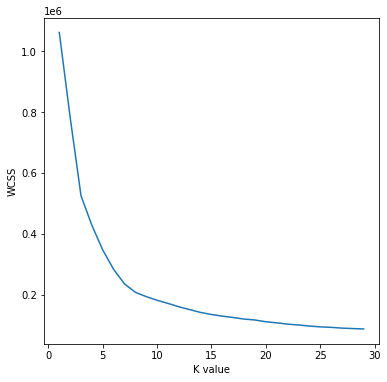

In [ ]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 30):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(mars_norm_array)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (6, 6))
plt.plot(range(1, 30), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Fitting K-Means to the dataset assuming 10 clusters
kmeans10 = KMeans(n_clusters = 10)
y10_kmeans = kmeans10.fit_predict(mars_norm_array)

In [ ]:
new_mars.head()

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3,kmeans10
0,-457,0.449035,-10,-457,0,0,0,0,7
1,-456,0.531747,-7,-456,0,0,0,0,7
2,-455,0.545835,-9,-455,0,0,0,0,7
3,-452,0.326724,2,-452,0,0,0,0,7
4,-452,0.243527,-2,-452,0,0,0,0,7


In [ ]:
# assign the cluster labels for k=10 to a new column
new_mars["kmeans10"]=y10_kmeans

In [ ]:
# view the new house_data dataframe
new_mars.head()

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3,kmeans10
0,-457,0.449035,-10,-457,0,0,0,0,7
1,-456,0.531747,-7,-456,0,0,0,0,7
2,-455,0.545835,-9,-455,0,0,0,0,7
3,-452,0.326724,2,-452,0,0,0,0,7
4,-452,0.243527,-2,-452,0,0,0,0,7


In [ ]:
# Fitting K-Means to the dataset assuming 20 clusters
kmeans20 = KMeans(n_clusters = 20)
y20_kmeans = kmeans20.fit_predict(mars_norm_array)

In [ ]:
# assign the cluster labels for k=20 to a new column
new_mars["kmeans20"]=y20_kmeans

In [ ]:
# view the new house_data dataframe
new_mars.head()

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3,kmeans10,kmeans20
0,-457,0.449035,-10,-457,0,0,0,0,7,18
1,-456,0.531747,-7,-456,0,0,0,0,7,18
2,-455,0.545835,-9,-455,0,0,0,0,7,18
3,-452,0.326724,2,-452,0,0,0,0,7,18
4,-452,0.243527,-2,-452,0,0,0,0,7,18


In [ ]:
# Fitting K-Means to the dataset assuming 30 clusters
kmeans30 = KMeans(n_clusters = 30)
y30_kmeans = kmeans30.fit_predict(mars_norm_array)

In [ ]:
# assign the cluster labels for k=30 to a new column
new_mars["kmeans30"]=y30_kmeans

In [ ]:
# view the new house_data dataframe
new_mars.head()

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3,kmeans10,kmeans20,kmeans30
0,-457,0.449035,-10,-457,0,0,0,0,7,18,2
1,-456,0.531747,-7,-456,0,0,0,0,7,18,2
2,-455,0.545835,-9,-455,0,0,0,0,7,18,2
3,-452,0.326724,2,-452,0,0,0,0,7,18,2
4,-452,0.243527,-2,-452,0,0,0,0,7,18,2


In [ ]:
new_mars_copy['kmeans30'] = y30_kmeans

In [ ]:
new_mars_copy.head()

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3,kmeans30
0,-457,0.449035,-10,-457,0,0,0,0,11
1,-456,0.531747,-7,-456,0,0,0,0,11
2,-455,0.545835,-9,-455,0,0,0,0,11
3,-452,0.326724,2,-452,0,0,0,0,11
4,-452,0.243527,-2,-452,0,0,0,0,11


Plotting the K-means Maps of the Variables

In [ ]:
kmeans10_=np.array(new_mars['kmeans10']).reshape(352,377)
kmeans20_=np.array(new_mars['kmeans20']).reshape(352,377)
kmeans30_=np.array(new_mars['kmeans30']).reshape(352,377)

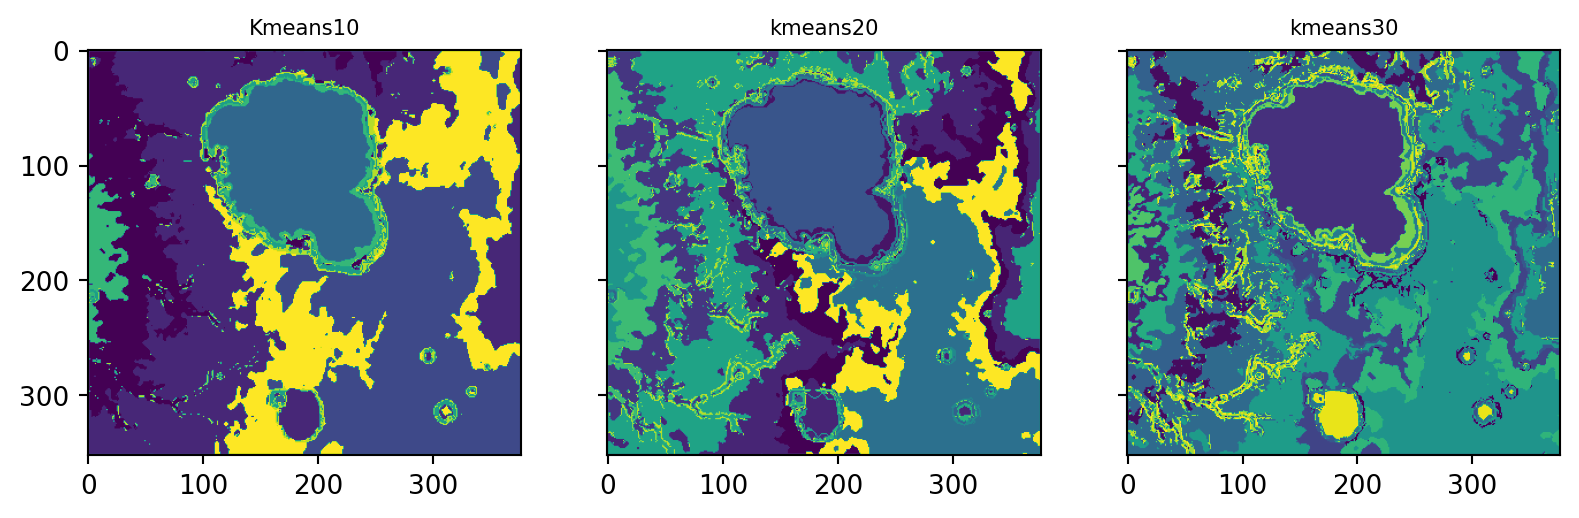

In [ ]:
#Plot the Maps of the Variables
fig, ax = plt.subplots(1,3,figsize=(10, 60),dpi=190, sharey=True)

ax[0].imshow(kmeans10_)
ax[0].set_title('Kmeans10',{'fontsize':8})
ax[1].imshow(kmeans20_)
ax[1].set_title('kmeans20',{'fontsize':8})
ax[2].imshow(kmeans30_)
ax[2].set_title('kmeans30',{'fontsize':8})
plt.show()

From the K-means analysis above, the K means of 10 clusters shows all the details as depicted in the test data image of the data description file. I can spot all the geomorphologic features described, such as craters, inter-crater plateau, ridges and channels.
for K-means 20, all features mentioned above can be seen however, the image has much more details/features that are not seen in the Kmeans10 image. The same applies for K-means 30, the geomorphologic features increases beyond that seen in K-means 20.
Depending on the kind of geomorphological features we need to find, an increase in features can be of advantage or disadvantage. For instance, having alot of minor features can prevent us from seeing bigger more general features that we might be looking out for. On the other hand, having fewer features might mean overlooking some important features at the location.


In [ ]:
#choosing only a subset of the data to carryout the K-means analysis
s_mars= mars_norm.drop(['slope','filter','fill_diff','hillshade1'],axis=1)
subset_mars = np.array(s_mars)


In [ ]:
from sklearn.cluster import KMeans
# Fitting K-Means to the dataset assuming 10 clusters
kmeans10_sub = KMeans(n_clusters = 10)
y10_kmeans_sub = kmeans10_sub.fit_predict(subset_mars)

In [ ]:
# assign the cluster labels for k=10 to a new column
s_mars["kmeans10_sub"]=y10_kmeans_sub

In [ ]:
# Fitting K-Means to the dataset assuming 20 clusters
kmeans20_sub = KMeans(n_clusters = 20)
y20_kmeans_sub = kmeans20_sub.fit_predict(subset_mars)

In [ ]:
# assign the cluster labels for k=20 to a new column
s_mars["kmeans20_sub"]=y20_kmeans_sub

In [ ]:
# Fitting K-Means to the dataset assuming 30 clusters
kmeans30_sub = KMeans(n_clusters = 30)
y30_kmeans_sub = kmeans30_sub.fit_predict(subset_mars)

In [ ]:
# assign the cluster labels for k=30 to a new column
s_mars["kmeans30_sub"]=y30_kmeans_sub

In [ ]:
s_mars.head()

,dem,fill_dem,hillshade2,hillshade3,kmeans10_sub,kmeans20_sub,kmeans30_sub
0,-0.643278,-1.288759,-1.848145,-1.023313,4,17,6
1,-0.641168,-1.285675,-1.848145,-1.023313,4,17,6
2,-0.639058,-1.282590,-1.848145,-1.023313,4,17,6
3,-0.632728,-1.273336,-1.848145,-1.023313,4,17,6
4,-0.632728,-1.273336,-1.848145,-1.023313,4,17,6


In [ ]:
kmeans10_sub_=np.array(s_mars['kmeans10_sub']).reshape(352,377)
kmeans20_sub_=np.array(s_mars['kmeans20_sub']).reshape(352,377)
kmeans30_sub_=np.array(s_mars['kmeans30_sub']).reshape(352,377)

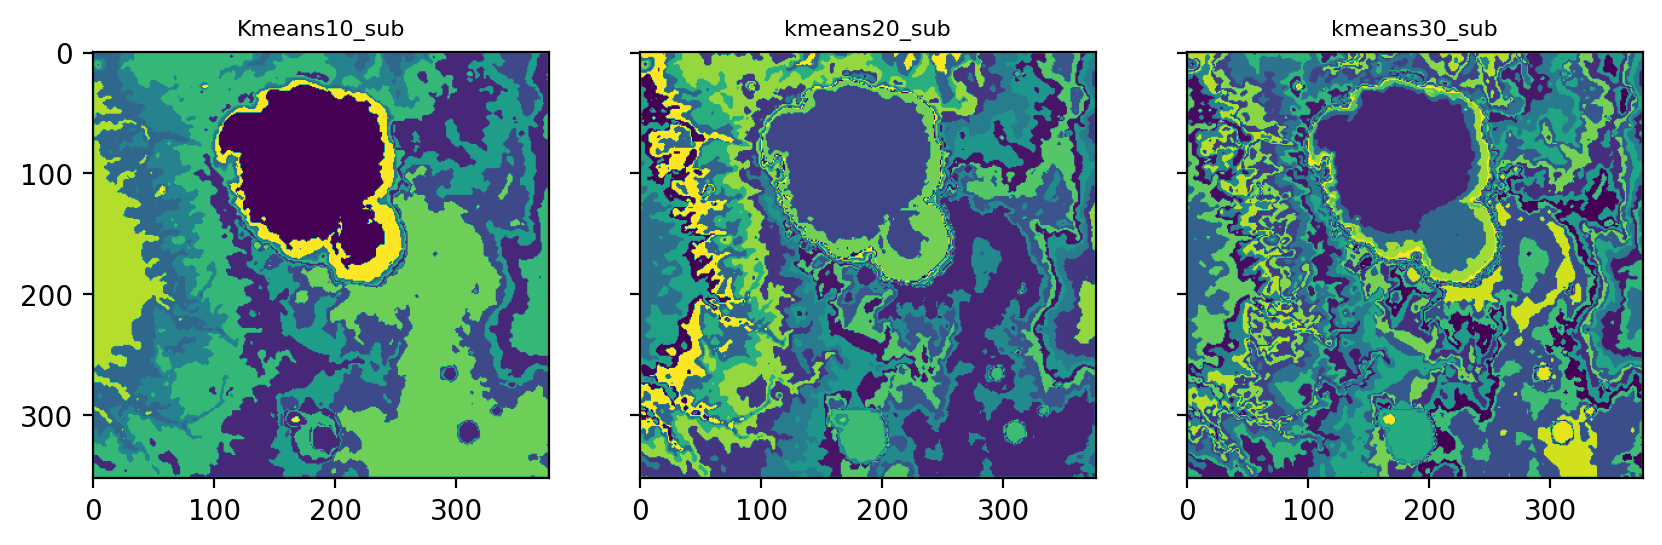

In [ ]:
#Plot the Maps of the Variables
fig, ax = plt.subplots(1,3,figsize=(10, 60),dpi=200, sharey=True)

ax[0].imshow(kmeans10_sub_)
ax[0].set_title('Kmeans10_sub',{'fontsize':8})
ax[1].imshow(kmeans20_sub_)
ax[1].set_title('kmeans20_sub',{'fontsize':8})
ax[2].imshow(kmeans30_sub_)
ax[2].set_title('kmeans30_sub',{'fontsize':8})
plt.show()

From the K-means analysis above, the K means of 10 for a subset of the data shows all the details as depicted in the test data image of the data description file. Although some features like the crater on the lower end of the image is not easily distinguished or spotted unlike in the inital Kmeans 10 image containing all the variables. Also as we increase the number of clusters we begin to loose features due to the increase in only specific feautures that are based on the variables I selected. At Kmeans 30, it is almost impossible to make sense of the image or spot features like inter-crater plateau, craters (except the really obvious big crater at the top), almost everything begins to look like channels. This explains what I described earlier that depending on the kind of geomorphological features we need to find, an increase in features can mean missing out from seeing bigger more general features that we might be looking out for. Plus in this situation we have already lost some information by excluding certain variables.


Hierarchical Clustering

In [ ]:
#average the dataframe over the kmeans 30 column
mars_hierarch = new_mars_copy.groupby(['kmeans30'])['dem','slope','filter','fill_dem','fill_diff','hillshade1','hillshade2','hillshade3'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
mars_hierarch

,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3
kmeans30,,,,,,,,
0,-190.004741,5.522748,-47.024496,-175.927697,14.077045,181.393520,36.359147,4.536152
1,-449.765165,2.067455,2.648227,-446.513351,3.251814,181.531699,117.607559,3.299329
2,307.805522,1.486787,0.750118,308.340903,0.535381,180.325638,146.577311,126.935080
3,-1095.647088,0.619472,-0.992302,-277.851023,817.796065,164.018533,180.461116,121.999857
4,-181.390683,3.899302,28.973348,-180.802384,0.588299,181.686241,33.325244,4.354496
5,-706.831712,2.390278,-5.050097,-700.685311,6.146401,109.810798,181.182393,68.873541
6,-243.689308,21.306770,13.387421,-126.433962,117.255346,151.806289,72.028931,16.532075
7,207.677395,1.520864,-0.000753,208.843215,1.165820,180.383399,114.932242,74.744024
8,-124.762677,18.051015,188.730223,-46.519270,78.243408,170.807302,101.734280,47.760649


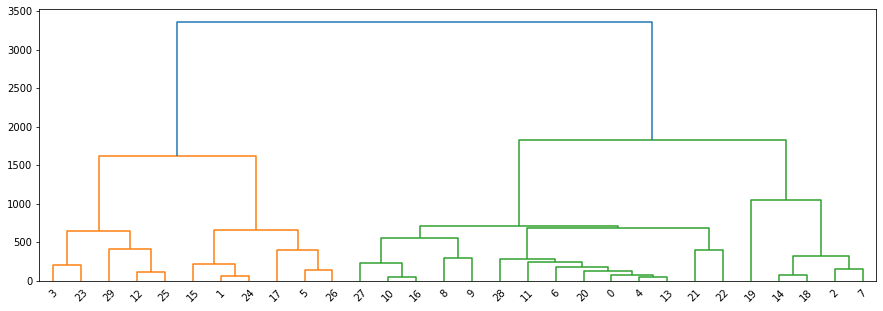

In [ ]:
# perfrom hierarchical clustering using ward linkage - plot dendrogram
from scipy.cluster.hierarchy import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# use 'ward' method.
mars_h = linkage(mars_hierarch, 'ward')

plt.figure(figsize=(15,5))
P = dendrogram(mars_h);


In [ ]:
# separate the data into 10 clusters based on the linkage matrix Z
T = fcluster(mars_h, 10, 'maxclust')
# assign the cluster labels to a new column
mars_hierarch["cluster_ward"]=T
mars_hierarch = mars_hierarch.reset_index()
# view the new dataframe
mars_hierarch.head()

,level_0,index,kmeans30,dem,slope,filter,fill_dem,fill_diff,hillshade1,hillshade2,hillshade3,cluster_ward
0,0,0,0,-190.004741,5.522748,-47.024496,-175.927697,14.077045,181.393520,36.359147,4.536152,7
1,1,1,1,-449.765165,2.067455,2.648227,-446.513351,3.251814,181.531699,117.607559,3.299329,3
2,2,2,2,307.805522,1.486787,0.750118,308.340903,0.535381,180.325638,146.577311,126.935080,9
3,3,3,3,-1095.647088,0.619472,-0.992302,-277.851023,817.796065,164.018533,180.461116,121.999857,1
4,4,4,4,-181.390683,3.899302,28.973348,-180.802384,0.588299,181.686241,33.325244,4.354496,7


In [ ]:
#merge the dataframes in order to map out the new cluster_ward column to the original dataframe dimensions of 132704 rows
final_hier_df = pd.merge(new_mars_copy, mars_hierarch, how='left',on='kmeans30')
final_hier_df.head()

,dem_x,slope_x,filter_x,fill_dem_x,fill_diff_x,hillshade1_x,hillshade2_x,hillshade3_x,kmeans30,dem_y,slope_y,filter_y,fill_dem_y,fill_diff_y,hillshade1_y,hillshade2_y,hillshade3_y,cluster_ward
0,-457,0.449035,-10,-457,0,0,0,0,11,-159.448613,1.033382,18.685155,-159.448613,0.0,0.0,0.0,0.0,7
1,-456,0.531747,-7,-456,0,0,0,0,11,-159.448613,1.033382,18.685155,-159.448613,0.0,0.0,0.0,0.0,7
2,-455,0.545835,-9,-455,0,0,0,0,11,-159.448613,1.033382,18.685155,-159.448613,0.0,0.0,0.0,0.0,7
3,-452,0.326724,2,-452,0,0,0,0,11,-159.448613,1.033382,18.685155,-159.448613,0.0,0.0,0.0,0.0,7
4,-452,0.243527,-2,-452,0,0,0,0,11,-159.448613,1.033382,18.685155,-159.448613,0.0,0.0,0.0,0.0,7


In [ ]:
#extract the cluster_ward column in its new dimension of 132704 columns and reshape
final_hier_array = np.array(final_hier_df['cluster_ward']).reshape(352,377)

Text(0.5, 1.0, 'Hierarchical Clusters')

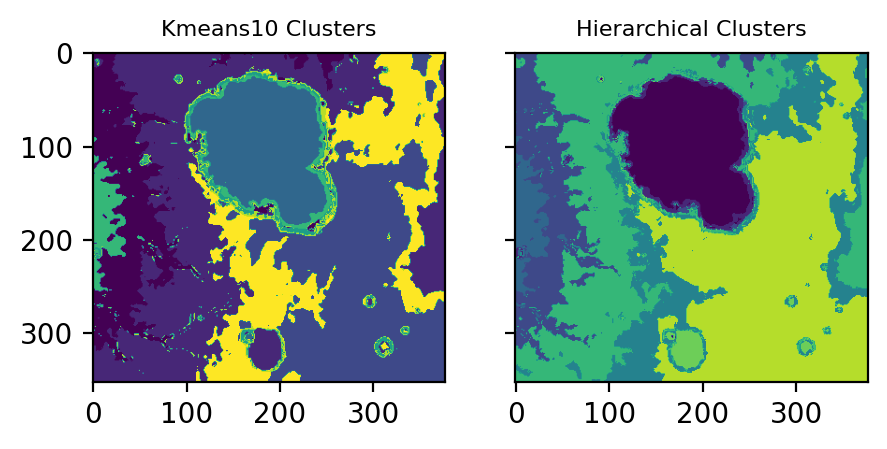

In [ ]:
#plot the hierarchical cluster image vs the k-means 10 cluster image
fig, ax = plt.subplots(1,2,figsize=(5, 5),dpi=200, sharey=True)

ax[0].imshow(kmeans10_)
ax[0].set_title('Kmeans10 Clusters',{'fontsize':8})
ax[1].imshow(final_hier_array)
ax[1].set_title('Hierarchical Clusters',{'fontsize':8})

From the hierarchical clustering image above of 10 clusters, I can see that the image shows all the geomorphologic features which include craters,ridges, inter-crater plateau and channels. Although the features are not as sharp as the Kmeans cluster of 10. The Kmeans 10 cluster also has more features than the hierarchical clusters. This is most likely as a result of the **averaging** of the data that was done in order to carryout the hierarchical clustering.